In [1]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

from matplotlib import pyplot

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Prepare datasets

In [2]:
# df = pd.read_pickle("Train.pkl")
traindf = pd.read_csv("diaTraining.csv")
traindf['Date'] = pd.to_datetime(traindf['Date'])
traindf.set_index('Date', inplace=True)
traindf = traindf.asfreq('d')

# testdf = pd.read_pickle("Test.pkl")
testdf = pd.read_csv("diaTest.csv")
testdf['Date'] = pd.to_datetime(testdf['Date'])
testdf.set_index('Date', inplace=True)
testdf = testdf.asfreq('d')

validdf = pd.read_csv("Outofsample.csv")
validdf['Date'] = pd.to_datetime(validdf['Date'])
validdf.set_index('Date', inplace=True)
validdf = validdf.asfreq('d')

trainTarget = traindf['Target'].copy()
testTarget = testdf['Target'].copy()
validTarget = validdf['Target'].copy()

KeyError: 'Target'

# Fit the model

In [ ]:
model = ARIMA(trainTarget, order=(10,0,10), missing='drop')
model_fit = model.fit(disp=0)

In [ ]:
print(model_fit.summary())

In [ ]:
# look at the residual to ensure there are no patterns (that is, look for constant mean and variance)
# normally distributed
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
# plot the actuals against the fitted values
model_fit.plot_predict(dynamic=False)
plt.show()

# Out of sample forecast

In [ ]:
# Forecast on the test
fc, se, conf = model_fit.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# ARMA on train and test dataset

In [20]:
trainAndTest = pd.concat([df, testdf])

target = trainAndTest['Target']

model = ARIMA(target, order=(10,0,10), missing='drop')
model_fit = model.fit(disp=0)

In [21]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 Target   No. Observations:                  754
Model:                   ARMA(10, 10)   Log Likelihood                2472.373
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 01 Jul 2020   AIC                          -4900.745
Time:                        09:15:19   BIC                          -4798.986
Sample:                             0   HQIC                         -4861.545
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      4.456      0.000       0.000       0.001
ar.L1.Target     -0.2529        nan        nan        nan         nan         nan
ar.L2.Target     -0.1013      0.117     

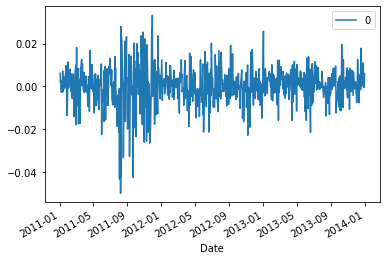

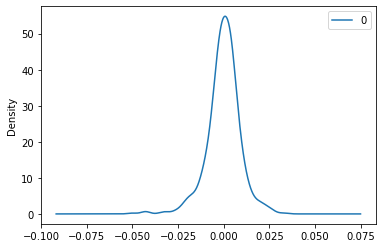

                0
count  754.000000
mean    -0.000028
std      0.009116
min     -0.050082
25%     -0.004345
50%      0.000287
75%      0.004825
max      0.033286


In [22]:
# look at the residual to ensure there are no patterns (that is, look for constant mean and variance)
# normally distributed
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

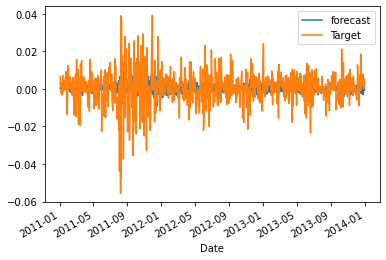

In [23]:
# plot the actuals against the fitted values
model_fit.plot_predict(dynamic=False)
plt.show()